![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 3 - Discriminative Classification </center>
### <center> Linear classifier</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/03_DiscriminativeClassfication/MainLinearClassifier.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

### Generate some training data:

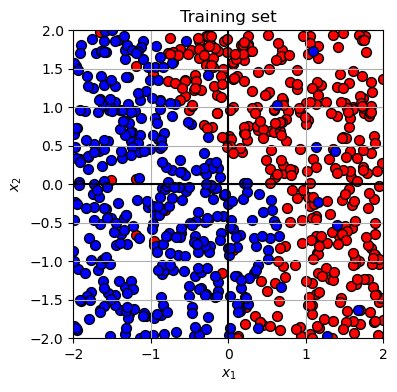

In [2]:
from scipy.spatial.distance import cdist

N  = 750
mX = np.random.rand(2, N)
xp = np.linspace   (0, 1, 6)
yp = np.array      ([0.5, 0.6, 0.7, 0.5, 0.3, 0.3])
xx = np.linspace   (0, 1, 1001)
yy = np.interp     (xx, xp, yp)
mP = np.stack      ([yy, xx])

mD        = cdist(mX.T, mP.T)
vMin      = np.argmin(mD, axis=1)
vY        = np.sign(mX[0] - yy[vMin])
vSwap     = np.random.permutation(N)[:50]
vY[vSwap] = np.roll(vY[vSwap], 1)
mX        = 4 * (mX - 1/2)

plt.figure (figsize=(4, 4)),
plt.grid   (True)
plt.scatter(mX[0,vY== 1], mX[1,vY== 1],  color='r', s=50, edgecolor='k')
plt.scatter(mX[0,vY==-1], mX[1,vY==-1], color='b', s=50, edgecolor='k')
plt.axvline(x=0,                        color='k')
plt.axhline(y=0,                        color='k')
plt.axis   ([-2, 2, -2, 2])
plt.title  ('Training set')
plt.xlabel ('$x_1$')
plt.ylabel ('$x_2$')
plt.show   ()

### Plot linear classifier:
$$f\left(\boldsymbol{w}\right)=\mathrm{sign}\left(\boldsymbol{w}^{T}\boldsymbol{x}-b\right)$$

In [3]:
from sklearn.neighbors import KNeighborsClassifier

#-- make grid for plot:
vv       = np.linspace(-2, 2, 150)
XX0, XX1 = np.meshgrid(vv, vv)
XX       = np.stack([XX0.flatten(), XX1.flatten()])

def PlotClassifier(θ, b):
    vW = np.array([np.cos(θ), np.sin(θ)])
    vZ = (vW @ XX - b) > 0
    ZZ = vZ.reshape(XX0.shape)
    
    vHatY    = np.sign(vW @ mX - b)
    accuracy = np.mean(vY == vHatY)

    v = np.array([-2, 2])
    plt.figure (figsize=(4, 4)),
    plt.grid   (True)
    plt.scatter(mX[0,vY== 1], mX[1,vY== 1], color='r', s=50, edgecolor='k', alpha=.75)
    plt.scatter(mX[0,vY==-1], mX[1,vY==-1], color='b', s=50, edgecolor='k', alpha=.75)
    plt.plot   (v, (b - vW[0] * v) / vW[1], color='k',      lw=2)
    plt.arrow  (0, 0, vW[0], vW[1],         color='orange', width=.05)
    plt.axvline(x=0,                        color='k', lw=1)
    plt.axhline(y=0,                        color='k', lw=1)
    plt.contourf(XX0, XX1, ZZ, colors=['blue', 'red'], alpha=0.2, levels=[-0.5, 0.5, 1.5], zorder=0)
    
    plt.axis   ([-2, 2, -2, 2])
    plt.title  (r'$f_{{w},b}\left({x}\right)={sign}\left({w}^{T}{x}-b\right)$' '\n' f'Accuracy = {accuracy:.3f}')
    plt.xlabel ('$x_1$')
    plt.ylabel ('$x_2$')
    
    plt.show   ()

In [4]:
from ipywidgets import interact, FloatSlider, Layout

θSlider = FloatSlider(min=0,    max=2*np.pi, step=2*np.pi/100, value=np.pi/3, layout=Layout(width='80%'))
bSlider = FloatSlider(min=-2.5, max=2.5,     step=0.2,         value=-.3,     layout=Layout(width='80%'))
interact(PlotClassifier, θ=θSlider, b=bSlider);

interactive(children=(FloatSlider(value=1.0471975511965976, description='θ', layout=Layout(width='80%'), max=6…